# Introduction To Regression With Neural Networks In Tensorflow

There are many definitions for a regression problem, but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables; even shorter... Predicting a number!

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating Data To View And Fit:

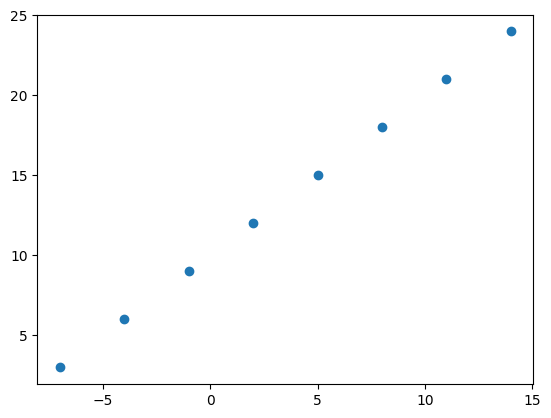

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10 #This is the relationship (function) we're going to make a neural network learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input And Output Shapes:

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0] #We want to use one input feature of X to predict one y value

(np.float64(-7.0), np.float64(3.0))

In [7]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape #This isn't the shape you're looking for!

((8,), (8,))

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #Not this either! These are scalar (rank 0) tensors, so they have no shape

((), ())

In [10]:
X[0], y[0] #We're going to use one X value to predict one y value

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #Still empty due to being scalars!

(TensorShape([]), TensorShape([]))

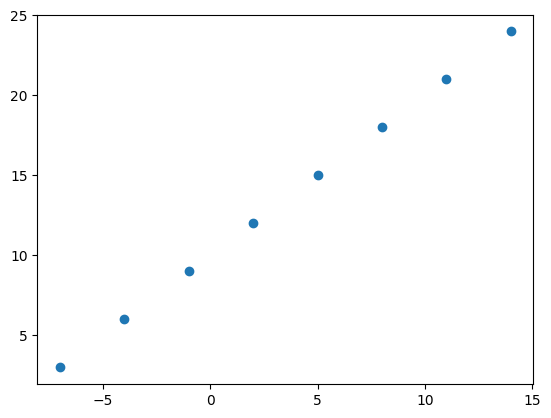

In [13]:
plt.scatter(X, y)

## Steps In Modelling With Tensorflow:

1. **Creating A Model** - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling A Model** - Define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting A Model** - Letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed for reproducability
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([ #Groups a linear stack of layers into a tf.keras.Model
    tf.keras.layers.Dense(1) #It's 1 because we want the model to take one number and predict one number from it
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(X, y, epochs = 5) #The epochs parameter specifies the number of times TensorFlow goes through all the X and y values to figure out the relationship; somewhat like cross-validation and gridsearch from scikit-learn

#You now have to add an additional dimension to your X with tf.expand_dims() as of TensorFlow 2.7.0. Let's retry this without all the coments but with the modified fitting step

Epoch 1/5


ValueError: Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

In [15]:
# Set random seed for reproducability
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step - loss: 17.0071 - mae: 17.0071
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 16.7258 - mae: 16.7258
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 16.4446 - mae: 16.4446
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 16.1633 - mae: 16.1633
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 15.8821 - mae: 15.8821


In [16]:
#An alternate way of creating the model:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using our model
model.predict([17.0]) #You now have to cast your value(s) you want to predict from to a NumPy array

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

In [19]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred #Right now, the model doesn't quite find  the correct patterns between X and y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[-9.284778]], dtype=float32)

## Improving Our Model:

We can improve our model by altering the steps we took to create a model.

1. **Creating A Model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, and/or change the activation function of each layer.
2. **Compiling A Model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting A Model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [20]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step - loss: 11.0890 - mae: 11.0890
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 10.9565 - mae: 10.9565
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 10.8240 - mae: 10.8240
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 10.6915 - mae: 10.6915
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 10.5590 - mae: 10.5590
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 10.4265 - mae: 10.4265
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 10.2940 - mae: 10.2940
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.1615 - mae: 10.1615
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 10.0290 - mae: 10.0290
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.8965 - mae: 9.8965
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 9.7640 - mae: 9.7640
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 9.6315 - mae: 9.6315
Epoch 13/100
1/1 ━━━━━━

In [21]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's see if our model's prediction has improved...
model.predict(np.array([17.0])) #The prediction is now much closer to the actual value of 27.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[29.788292]], dtype=float32)

In [23]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

#Note: It's a good idea to make one change to a model at a time rather than many at once to see what impacts the model's performance the most

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5423 - mae: 12.5423
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 12.0163 - mae: 12.0163
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 11.4882 - mae: 11.4882
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 10.9471 - mae: 10.9471
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 10.3841 - mae: 10.3841
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 9.7978 - mae: 9.7978
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 9.1771 - mae: 9.1771
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 8.5212 - mae: 8.5212
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.8331 - mae: 7.8331
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 7.1173 - mae: 7.1173
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 6.3712 - mae: 6.3712
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 5.5982 - mae: 5.5982
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [24]:
# Let's remind outselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's try to make a prediction
model.predict(np.array([17.0])) #Despite the loss and mae being smaller, this model actually predicted a value further off than the previous
#This could be due to the model overfitting the training data too well, and the error produced in training may not be a very valid representation of what it's actually doing
#The real way we evaluate a model is that we do so on new data rather than the existing data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[32.381756]], dtype=float32)

In [26]:
# Try again with a reduced hidden layer and an Adam optimizer

# 1. Create the model (but reducing the number of hidden units and taking away the activation function)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (but switch the optimizer to the Adam optimizer with a default learning rate of 0.001)
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.3549 - mae: 14.3549
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 14.2810 - mae: 14.2810
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 14.2071 - mae: 14.2071
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 14.1331 - mae: 14.1331
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 14.0592 - mae: 14.0592
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 13.9853 - mae: 13.9853
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 13.9114 - mae: 13.9114
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 13.8374 - mae: 13.8374
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 13.7635 - mae: 13.7635
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 13.6895 - mae: 13.6895
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 13.6156 - mae: 13.6156
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 13.5416 - mae: 13.5416
Epoch 13/100
1/1 ━━━━

In [27]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[30.827175]], dtype=float32)

In [28]:
# Try again with an increased learning rate for the Adam optimizer:

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (but increase the Adam optimizer's learning rate (lr) to 0.01)
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.0511 - mae: 11.0511
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 10.2466 - mae: 10.2466
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.4333 - mae: 9.4333
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 8.6105 - mae: 8.6105
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 7.7766 - mae: 7.7766
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 7.0530 - mae: 7.0530
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 7.0824 - mae: 7.0824
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 7.3281 - mae: 7.3281
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.4269 - mae: 7.4269
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 7.4113 - mae: 7.4113
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 7.3063 - mae: 7.3063
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 7.1314 - mae: 7.1314
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [29]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[26.970308]], dtype=float32)

## Evaluating A Model:

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it - > evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does a model perform while it learns?
* The predictions of the model - How do the predictions of a model line up against the ground truth (the original labels)?

In [30]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

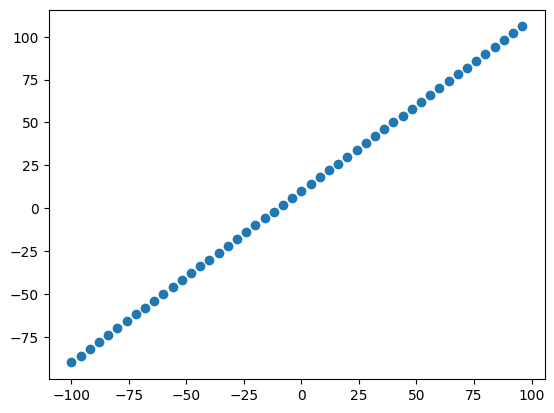

In [32]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 Sets...

* Training Set - The model learns from this data, which is typically 70 - 80% of the total data you have available.
* Validation Set - The model gets tuned on this data, which is typically 10 - 15% of the data available.
* Test Set - The model gets evaluated on this data to test what is has learned, this set is typically 10 - 15% of the total data available.

In [33]:
# Check the length of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing The Data:

Now we've got our data in training and test sets... let's visualize it again!

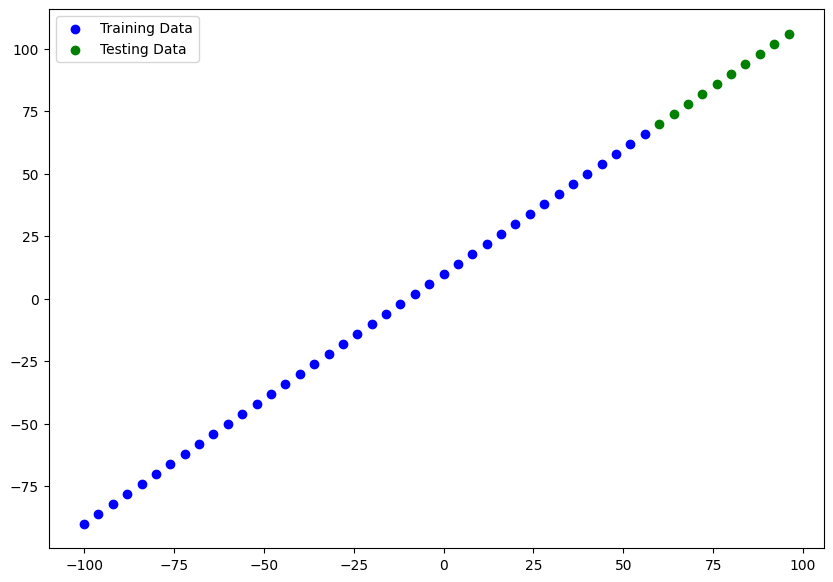

In [35]:
plt.figure(figsize = (10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label = 'Training Data') # Our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c = 'g', label = 'Testing Data') # Want our model to be able to predict this (given X what's y?)
plt.legend();

In [36]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

#We intentionally didn't fit the model yet

In [37]:
model.summary() #This used to cause an error stating that the model hasn't yet been built, which can be done by calling 'build()' or calling 'fit()' with some data, or by specifying an 'input_shape' in the first layer(s) for automatic build
#Instead, it outputs an empty model with unknown output shape and a default value of 0 for all params

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [39]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary() #Note: The model number increases with each new model compiled

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - Total number of parameters in the model.
* Trainable Params - These are the parameters (patterns) the model can update as it trains.
* Non-Trainable Params - These parameters aren't updated during training (this it typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, and see how that affects the number of parameters (total and trainable by calling 'model.summary()').

In [41]:
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape = [1])
])

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [42]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Let's fit our model to the training data
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100, verbose = 0)
#The verbose parameter specifies how much detail to show with the epoch progress
#0 = Silent
#1 = Progress Bar
#2 = One Line Per Epoch

In [44]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1])
])

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [46]:
model.summary() #There seems to be 2 trainable parameters per dense hidden unit

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
import pydot
import pydotplus
import graphviz

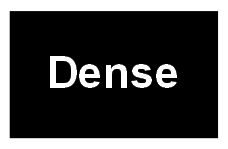

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model = model) #This looks very different from how it used to many tensorflow versions ago

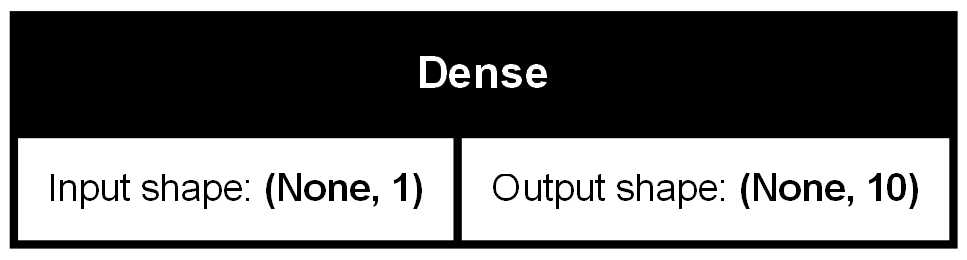

In [49]:
plot_model(model = model, show_shapes = True)

In [50]:
#Let's add another layer and see how that affects the model view
tf.random.set_seed(42)

# 1. Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input'),
    tf.keras.layers.Dense(1, name = 'output')
], name = 'model_1')

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [51]:
model.summary() #The model and layers take on the names you give them if you give them names

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [53]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

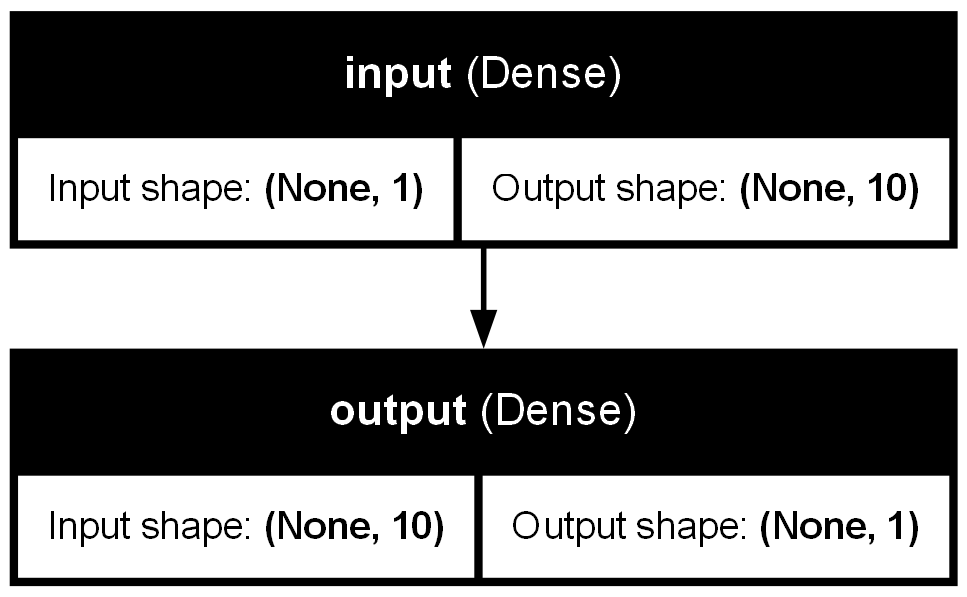

In [54]:
plot_model(model = model, show_shapes = True, show_layer_names = True)

### Visualizing Our Model's Predictions:

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [55]:
# Make some predictions
y_pred = model.predict(X_test) #Tensors can also be used as the input for the predict method
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[36.08212 ],
       [38.361763],
       [40.64141 ],
       [42.921066],
       [45.200714],
       [47.480362],
       [49.760014],
       [52.039665],
       [54.31931 ],
       [56.59896 ]], dtype=float32)

In [56]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [57]:
# Let's create a plotting function
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize = (10, 7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
    #Plot testing data in green
    plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
    #Plot model's predictions in red
    plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
    # Show the legend
    plt.legend();

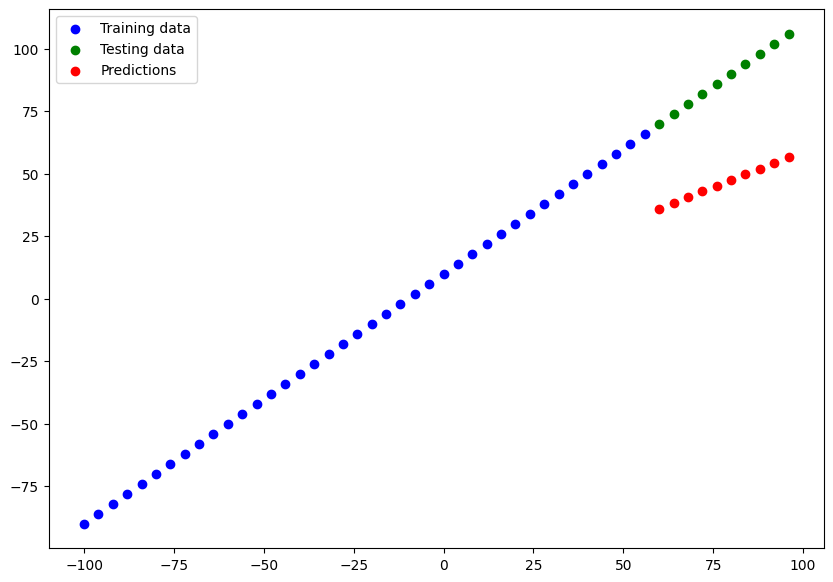

In [58]:
plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred)

In [59]:
#Switch to the model that appeared to make good predictions earlier
tf.random.set_seed(42)
tf.keras.backend.clear_session() #This clears tensorflow's memory of all previously created models

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape = [1], activation = None, name = 'input'),
    tf.keras.layers.Dense(1, name = 'output')
], name = 'model_2')

# 2. Compile the model (but increase the Adam optimizer's learning rate (lr) to 0.01)
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

In [60]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 3. Fit the model
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [62]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[ 69.02486 ],
       [ 72.96168 ],
       [ 76.8985  ],
       [ 80.83531 ],
       [ 84.772125],
       [ 88.70896 ],
       [ 92.64577 ],
       [ 96.58258 ],
       [100.51941 ],
       [104.45622 ]], dtype=float32)

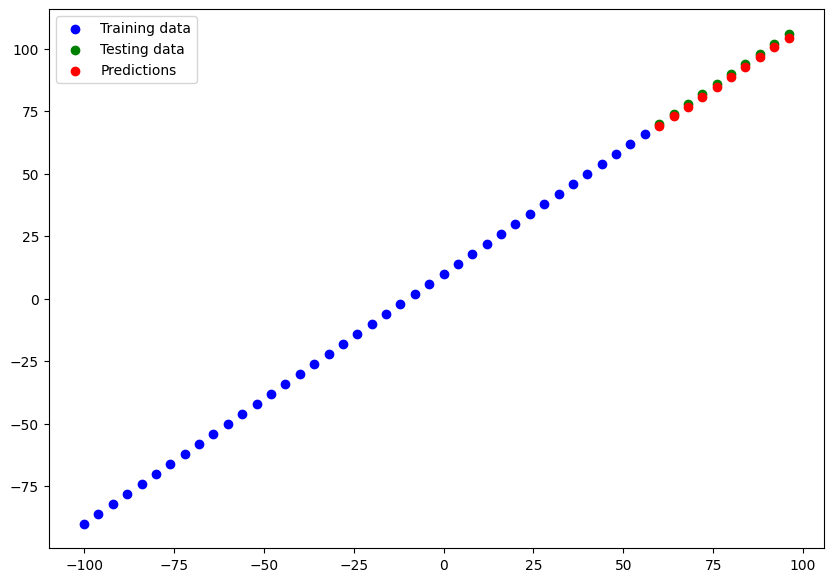

In [63]:
plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred)

### Evaluating Our Model's Predictions With Regression Evaluation Metrics:

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - Mean Absolute Error, "On average, how wrong is each of my model's predictions?"
* MSE - Mean Square Error, "Square the average errors." (This punishes predictions that are further off from the true value more than those that are close)

In [64]:
# Evaluate the model on the test
model.evaluate(X_test, y_test) #Returns the loss value and metrics values for the model in test mode

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 1.2595 - mae: 1.2595


[1.2594588994979858, 1.2594588994979858]

In [65]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred) #Update: Shortened to mae for ease of typing
mae

AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_absolute_error'

In [66]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true = y_test, y_pred = y_pred) #y_pred has to be in tensor format in order for metrics to work properly
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.97514343, 1.0383224 , 1.1015015 , 1.1646881 , 1.2278748 ,
       1.2910385 , 1.3542328 , 1.4174194 , 1.4805908 , 1.5437775 ],
      dtype=float32)>

In [67]:
y_pred

array([[ 69.02486 ],
       [ 72.96168 ],
       [ 76.8985  ],
       [ 80.83531 ],
       [ 84.772125],
       [ 88.70896 ],
       [ 92.64577 ],
       [ 96.58258 ],
       [100.51941 ],
       [104.45622 ]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [69]:
mae = tf.metrics.mae(y_true = y_test, y_pred = tf.constant(y_pred)) #And it has to be in the same shape as the y_test tensor
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.97514343, 1.0383224 , 1.1015015 , 1.1646881 , 1.2278748 ,
       1.2910385 , 1.3542328 , 1.4174194 , 1.4805908 , 1.5437775 ],
      dtype=float32)>

In [70]:
mae = tf.metrics.mae(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae #You're going to spend a lot of time reshaping tensors to ensure they're in the right shape and format for whatever function you're trying to work with

<tf.Tensor: shape=(), dtype=float32, numpy=1.2594588994979858>

In [71]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred) #Also shortened, this time to mse
mse

AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_squared_error'

In [72]:
mse = tf.metrics.mse(y_true = y_test, y_pred = y_pred) 
mse #Remember to squeeze the tensor to remove the single dimension

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.9509047, 1.0781136, 1.2133055, 1.3564984, 1.5076764, 1.6667805,
       1.8339465, 2.0090778, 2.1921492, 2.3832488], dtype=float32)>

In [73]:
mse = tf.metrics.mse(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.6191699504852295>

In [74]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mae(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mse(y_true = y_true, y_pred = tf.squeeze(y_pred))

### Running Experiments To Improve Our Model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get More Data - Get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make Your Model Larger (using a more complex model) - This might come in the form of more layers or more hidden units in each layer.
3. Train For Longer - Give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:
1. `model_1` - Same as the original model, 1 layer, trained for 100 epochs.
2. `model_2`  - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [77]:
# Set random seed
tf.random.set_seed(42)

#Clear existing models
tf.keras.backend.clear_session()

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 28.3214 - mae: 28.3214 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 9.4410 - mae: 9.4410
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 10.9835 - mae: 10.9835
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.5657 - mae: 7.5657
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 8.5865 - mae: 8.5865 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.0552 - mae: 10.0552
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.7679 - mae: 11.7679
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.6962 - mae: 8.6962
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.1650 - mae: 10.1650
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 11.9166 - mae: 11.9166
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 12.7213 - mae: 12.7213
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8.1664 - mae: 8.1664 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


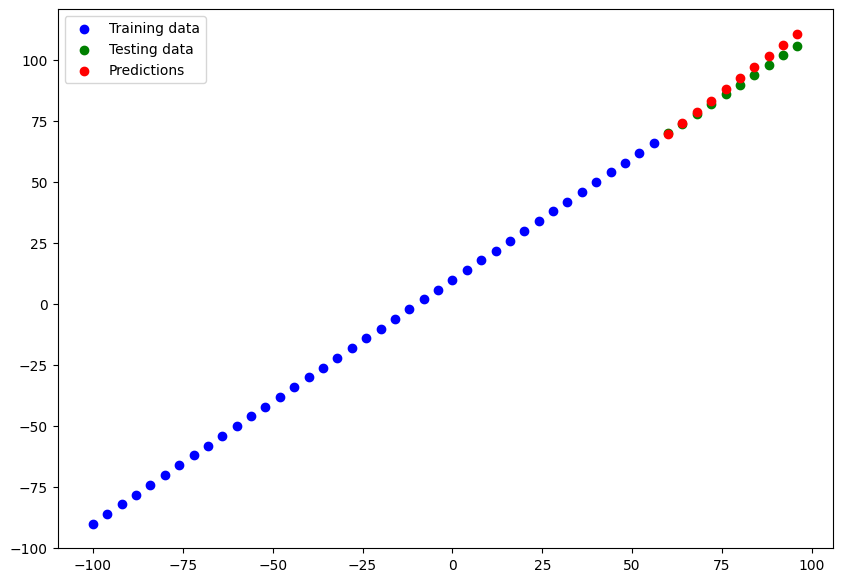

In [78]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [81]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3656203746795654>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.9991278648376465>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [82]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 43.2575 - mse: 2564.8450
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 31.5163 - mse: 1356.3975
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 26.5967 - mse: 963.1526 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 20.4324 - mse: 569.1644
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 17.7514 - mse: 434.7984
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 16.4060 - mse: 370.0251
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 16.4994 - mse: 368.3840
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 11.9574 - mse: 223.1094
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 14.8546 - mse: 307.1977
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 15.7310 - mse: 334.2769
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 11.8414 - mse: 215.0076
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 14.8310 - mse: 303.478

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


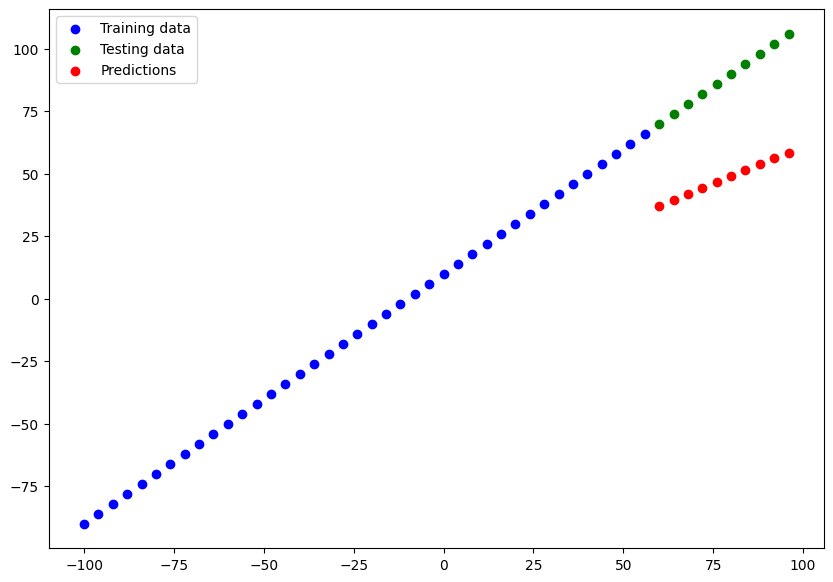

In [83]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [84]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=40.16965866088867>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1635.468505859375>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 14.3282 - mae: 14.3282 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 23.6253 - mae: 23.6253
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 22.8276 - mae: 22.8276
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 19.6380 - mae: 19.6380
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.1253 - mae: 18.1253
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.2185 - mae: 12.2185
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.0405 - mae: 15.0405
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.7279 - mae: 15.7279
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6995 - mae: 11.6995
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 14.6540 - mae: 14.6540
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 15.6695 - mae: 15.6695
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.8845 - mae: 11.8845
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


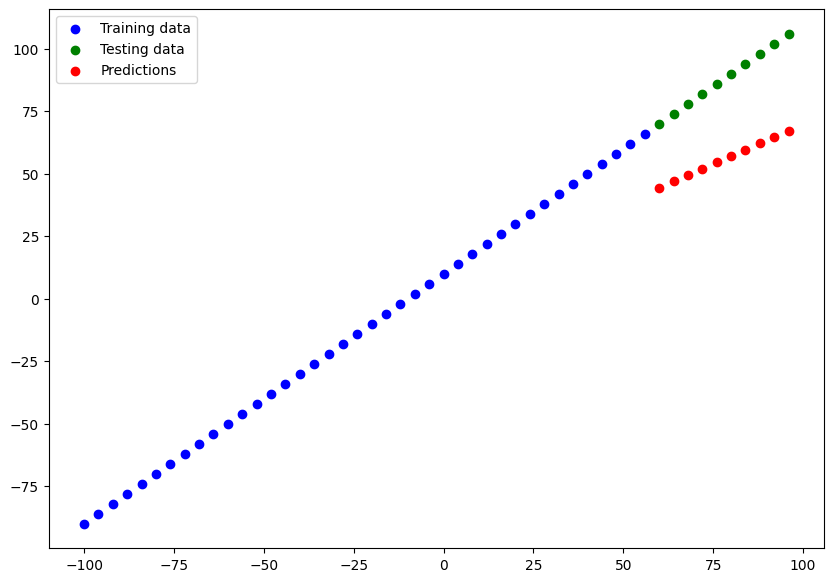

In [88]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [89]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=32.1148681640625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1048.988037109375>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing The Results Of Our Experiments:

We've run a few experiments, let's compare the results.

In [91]:
# Let's compare our model's results using a Pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,2.365620,7.999128
1,model_2,40.169659,1635.468506
2,model_3,32.114868,1048.988037


Looks like `model_1` performed the best...

In [92]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practicioner's motto: "experiment, experiment, experiment".

## Tracking Your Experiments:

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - A component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - A tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving Our Models:

Saving our models allows us to use them outside of VSCode (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_1.save('best_model_SavedModel_format') #The SavedModel format has been replaced by the keras format, which you need to explicitly state

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_model_SavedModel_format.

In [96]:
# Save model using the SavedModel format
model_1.save('best_model_keras_format.keras')

In [97]:
# Save model using the HDF5 format
model_1.save('best_model_HDF5_format.h5')

## Loading In A Saved Model:

In [101]:
# Load in the karas format model
loaded_keras_format = tf.keras.models.load_model('best_model_keras_format.keras')
loaded_keras_format.summary()

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

In [ ]:
model_1.summary() #The model architectures are the same

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

⚠️ **Caution:** A bunch of mistakes are ahead!

In [114]:
# Compare model_1 predictions with keras format model predictions
model_1_preds = model_1.predict(X_test)
loaded_keras_format_preds = loaded_keras_format.predict(X_test)
model_1_preds == loaded_keras_format

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
model_1_preds, loaded_keras_format_preds #Bizarrely, the predictions appear to be the same, but aren't actually equal

(array([[ 69.81142 ],
        [ 74.370636],
        [ 78.929855],
        [ 83.489075],
        [ 88.048294],
        [ 92.60751 ],
        [ 97.16673 ],
        [101.72595 ],
        [106.28517 ],
        [110.84439 ]], dtype=float32),
 array([[ 69.81142 ],
        [ 74.370636],
        [ 78.929855],
        [ 83.489075],
        [ 88.048294],
        [ 92.60751 ],
        [ 97.16673 ],
        [101.72595 ],
        [106.28517 ],
        [110.84439 ]], dtype=float32))

In [ ]:
# Compare the MAE of model_1_preds and loaded_keras_preds
mae(y_true = y_test, y_pred = model_1_preds) == mae(y_true = y_test, y_pred = loaded_keras_format_preds)
#While the predictions themselves are slightly off from each other, the mae appears to be the same for the original and loaded models, so it may just be an issue about how the coumputer stores numbers

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [110]:
model_1_preds.squeeze()

array([ 69.81142 ,  74.370636,  78.929855,  83.489075,  88.048294,
        92.60751 ,  97.16673 , 101.72595 , 106.28517 , 110.84439 ],
      dtype=float32)

In [111]:
loaded_keras_format_preds.squeeze()

array([ 69.81142 ,  74.370636,  78.929855,  83.489075,  88.048294,
        92.60751 ,  97.16673 , 101.72595 , 106.28517 , 110.84439 ],
      dtype=float32)

In [ ]:
model_1_preds.squeeze() == loaded_keras_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

⚠️ End Of Mistakes

In [115]:
# Compare model_1 predictions with keras format model predictions
model_1_preds = model_1.predict(X_test)
loaded_keras_format_preds = loaded_keras_format.predict(X_test)
model_1_preds == loaded_keras_format_preds
# Oops, looks like we actually compared model_1's predictions to the loaded model itself rather than to its predictions!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [117]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [118]:
# Check to see if loaded .h5 model predictions match model_1
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download A Model (Or Any Other File) From Google Colab:

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below). - This won't work in VSCode, as it already saves your files directly to your machine.
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below). - Also N/A for VSCode for the same reason as 2.

In [119]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

ModuleNotFoundError: No module named 'google.colab'

In [120]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp best_model_HDF5_format.h5 INSERT_DRIVE_FOLDER_HERE

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [121]:
!ls INSERT_DRIVE_FOLDER_HERE

'ls' is not recognized as an internal or external command,
operable program or batch file.


## A Larger Example:

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance['sex'] #This cannot be fed into a tensorflow machine learning model

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [4]:
insurance['smoker'] #Neither can this

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [5]:
insurance['smoker'], insurance['age'] #We have some columns that are numerical and some that aren't

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [6]:
# Let's try to one-hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [8]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [9]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Create training an test sets
from sklearn.model_selection import train_test_split #We will be pulling a couple helper functions from sklearn, mainly for preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [11]:
0.2 * 1338

267.6

In [12]:
X_train #Remember: In addition to the split itself, train_test_split also shuffles each set, but ensures that the individual X and y of the training and testing sets correspond to each other as in the original datasets

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [13]:
# Build a neural network (sort of like the models above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100) #Tensorflow can directly use Pandas Dataframes as input for models! Better yet, you don't have to call expand_dims when using dataframes as input!

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10278.4463 - mae: 10278.4463
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7624.6743 - mae: 7624.6743
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7356.8306 - mae: 7356.8306
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7656.3716 - mae: 7656.3716
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7405.2446 - mae: 7405.2446
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7667.4893 - mae: 7667.4893
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7444.5391 - mae: 7444.5391
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7518.5293 - mae: 7518.5293
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7827.5610 - mae: 7827.5610
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7628.8257 - mae: 7628.8257
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7454.0815 - mae: 7454.0815
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [14]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8022.0386 - mae: 8022.0386 


[7987.90478515625, 7987.90478515625]

In [15]:
y_train.median(), y_train.mean() #Right now, our model's substantially wrong, being off by an average of nearly 7000

(np.float64(9575.4421), np.float64(13346.089736364485))

Right now, it looks like our model isn't performing too well... let's try and improve it!

To (try to) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer (you'll see why the Adam optimizer ahead)
2. Same as above, but train for longer (200 epochs)

In [16]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mae: nan                
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan
Epoch 14/100
34/3

In [17]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test) #WARNING: If you make your model too complex for a particular dataset, it won't be able to learn anything on the dataset; in other words, the model can be not large enough to teach a very complex model anything

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan


[nan, nan]

In [18]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
#Sometimes changing the optimizer fixes models

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13277.6963 - mae: 13277.6963
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13110.2021 - mae: 13110.2021
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12792.3506 - mae: 12792.3506
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12160.9619 - mae: 12160.9619
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11064.3027 - mae: 11064.3027
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9607.5244 - mae: 9607.5244
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8220.3867 - mae: 8220.3867
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7496.7402 - mae: 7496.7402
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7385.7690 - mae: 7385.7690
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7359.6099 - mae: 7359.6099
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7337.9707 - mae: 7337.9707
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

In [19]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test) 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4835.2891 - mae: 4835.2891  


[4700.92919921875, 4700.92919921875]

In [20]:
insurance_model.evaluate(X_test, y_test) #The new model is around a 30% decrease in error from this original one

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8022.0386 - mae: 8022.0386  


[7987.90478515625, 7987.90478515625]

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13282.1533 - mae: 13282.1533
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13183.3398 - mae: 13183.3398
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12968.5322 - mae: 12968.5322
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12506.3369 - mae: 12506.3369
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11640.4424 - mae: 11640.4424
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10315.1523 - mae: 10315.1523
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8825.9268 - mae: 8825.9268
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7721.4536 - mae: 7721.4536
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7408.5591 - mae: 7408.5591
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7367.3115 - mae: 7367.3115
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7347.2729 - mae: 7347.2729
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3501.9961 - mae: 3501.9961  


[3434.464599609375, 3434.464599609375]

In [23]:
insurance_model.evaluate(X_test, y_test) #Now we halved our error from this original model with the newest one!

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8022.0386 - mae: 8022.0386 


[7987.90478515625, 7987.90478515625]

Text(0.5, 0, 'epochs')

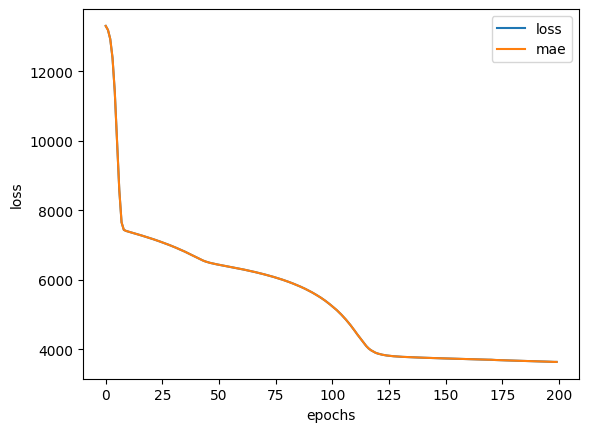

In [24]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing Data (Normailzation And Standardization):

In terms of scaling values, nerual networks tend to perfer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train) #Remember not to fit to the test data in order to prevent data leakage!

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [31]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [32]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [33]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [35]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - loss: 13297.7490 - mae: 13297.7490
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 13291.8301 - mae: 13291.8301
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 13276.9473 - mae: 13276.9473
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 13243.3271 - mae: 13243.3271
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 13179.9062 - mae: 13179.9062
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 13074.8828 - mae: 13074.8828
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 12916.9482 - mae: 12916.9482
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 12695.7861 - mae: 12695.7861
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 12401.5049 - mae: 12401.5049
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 12025.6172 - mae: 12025.6172
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 11573.8633 - mae: 11573.8633
Epoch 12/100
3

In [36]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3518.2390 - mae: 3518.2390  


[3431.87353515625, 3431.87353515625]

In [37]:
# Insurance model 2 results
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4835.2891 - mae: 4835.2891